# India ML Hiring Hackathon 2019

# Loan Delinquency Prediction for upcoming month

In [63]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

### Performance Matrics

# EDA 

In [4]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [5]:
train_data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


## Check Missing Values

In [6]:
train_data.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [7]:
# There is no missing value in train data. Lets check each fields one by one.

### Class Balanced or Imbalanced?

In [8]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))

In [9]:
train_data['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

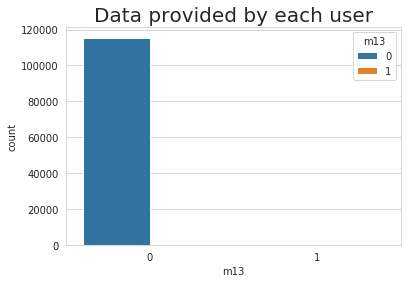

In [10]:
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='m13',hue='m13', data = train_data)
plt.show()

In [11]:
# Data is highly imbalanced. There are very few 

### source

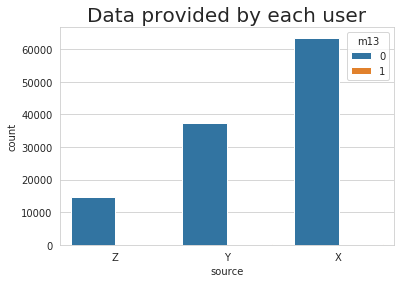

In [12]:
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='source',hue='m13', data = train_data)
plt.show()

### financial_institution

In [13]:
train_data['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

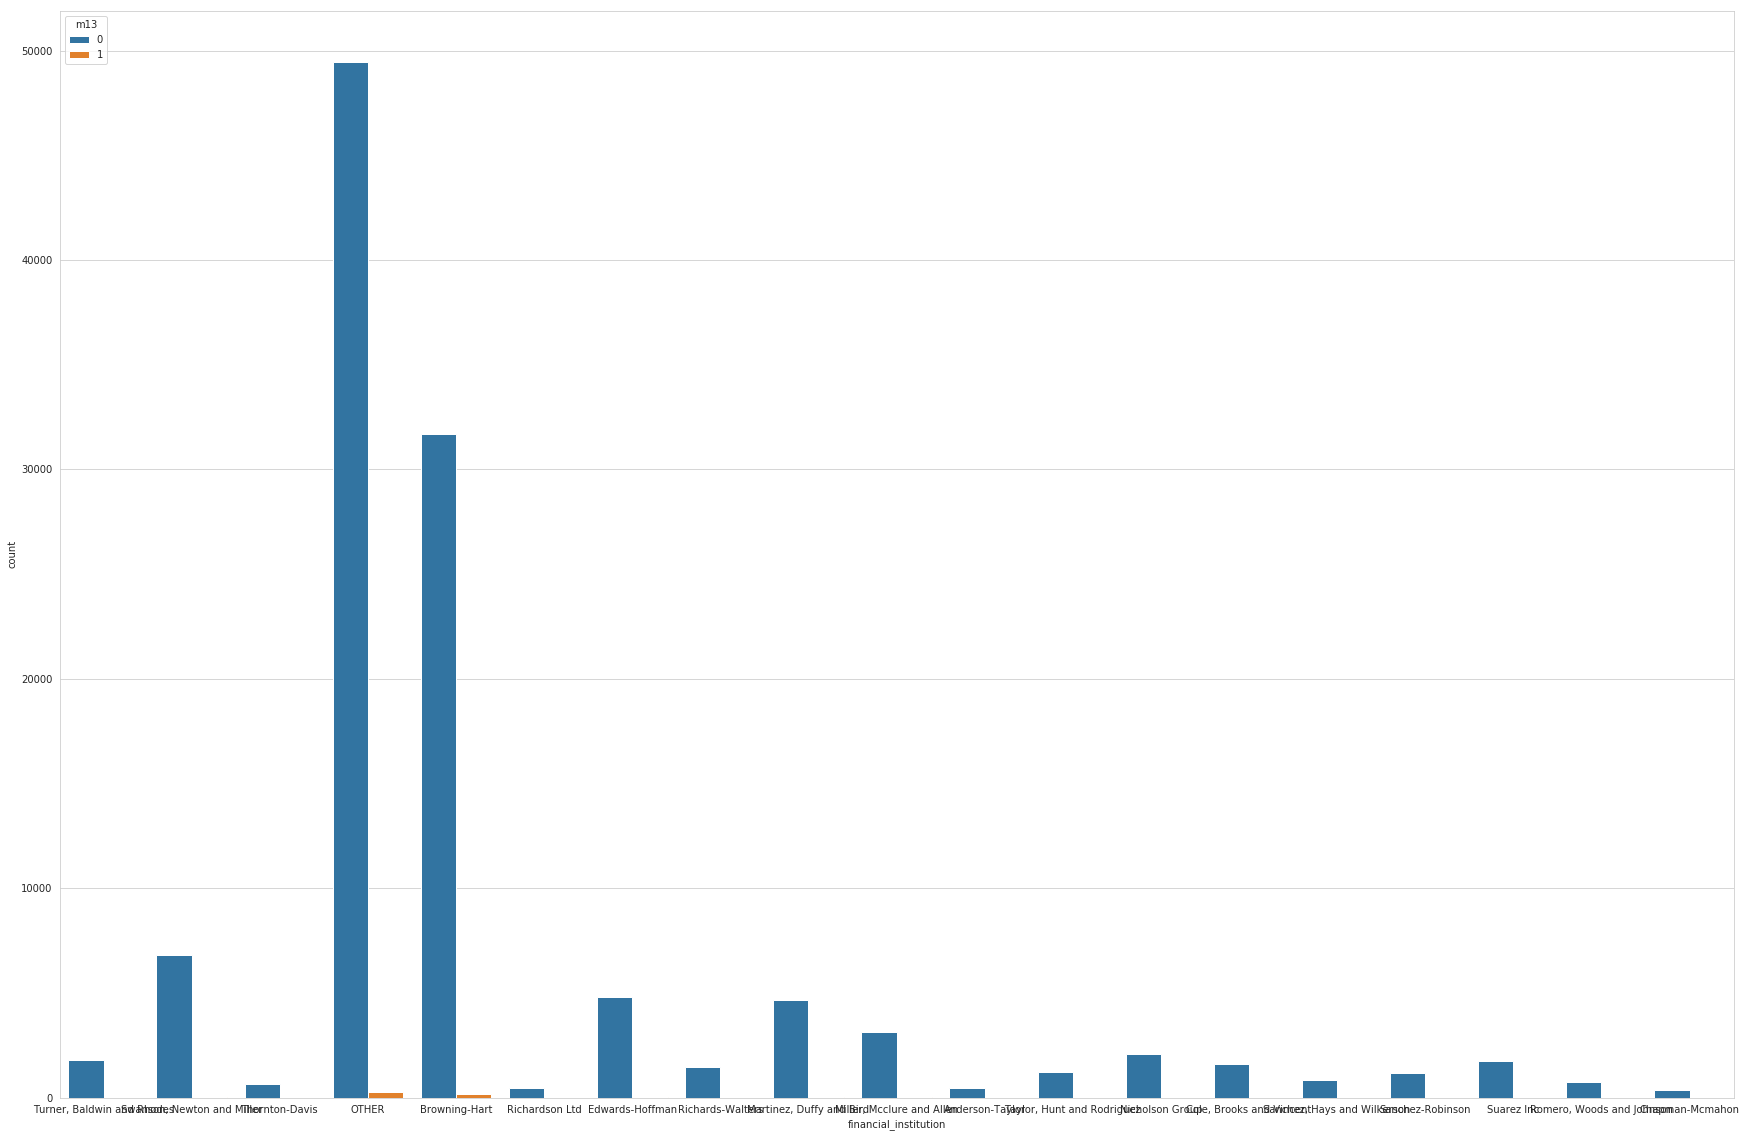

In [14]:
plt.figure(figsize=(30,20))
sns.countplot(x='financial_institution',hue='m13', data = train_data)

In [15]:
train_data[['financial_institution','m13']].pivot_table(index='financial_institution', columns='m13', 
                        aggfunc=len, fill_value=0)

m13,0,1
financial_institution,,
Anderson-Taylor,480,3
Browning-Hart,31677,175
Chapman-Mcmahon,388,0
"Cole, Brooks and Vincent",1630,12
Edwards-Hoffman,4816,41
"Martinez, Duffy and Bird",4692,23
"Miller, Mcclure and Allen",3139,19
Nicholson Group,2105,11
OTHER,49430,269


### interest_rate

In [16]:
defaultpayment = train_data[train_data['m13']==1]['interest_rate'].values

successpayment = train_data[train_data['m13']==0]['interest_rate'].values

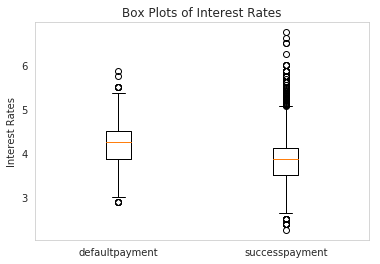

In [17]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Interest Rates')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Interest Rates')
plt.grid()
plt.show()

In [18]:
# we could see most defaulters have to pay more interest rates 

### unpaid_principal_bal

In [19]:
defaultpayment = train_data[train_data['m13']==1]['unpaid_principal_bal'].values

successpayment = train_data[train_data['m13']==0]['unpaid_principal_bal'].values

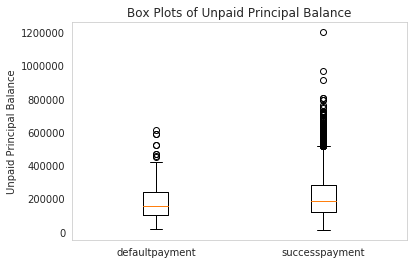

In [20]:
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Unpaid Principal Balance')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('Unpaid Principal Balance')
plt.grid()
plt.show()

### loan_term

In [21]:
train_data["loan_term"].value_counts()

360    71812
180    28584
120     7061
240     6749
300      912
96       178
156       92
144       73
336       64
324       53
168       40
348       33
108       29
276       22
84        21
312       19
132       19
216       16
121       14
288       13
264       13
228        8
150        7
162        6
60         6
166        5
153        5
163        4
158        4
165        4
       ...  
91         1
219        1
347        1
100        1
220        1
93         1
157        1
349        1
94         1
290        1
223        1
280        1
295        1
359        1
172        1
274        1
351        1
83         1
275        1
174        1
110        1
85         1
88         1
149        1
341        1
86         1
171        1
278        1
107        1
319        1
Name: loan_term, Length: 140, dtype: int64

In [22]:
defaultpayment = train_data[train_data['m13']==1]['loan_term'].values

successpayment = train_data[train_data['m13']==0]['loan_term'].values

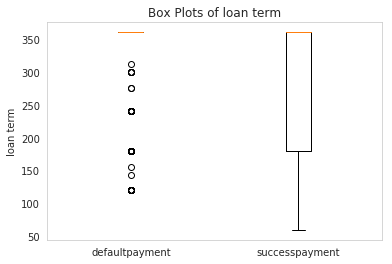

In [23]:
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of loan term')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('loan term')
plt.grid()
plt.show()

### origination_date

In [24]:
def format_date(col):
    temp = []
    for x in pd.to_datetime(col, format="%Y-%m-%d"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

In [25]:
train_data['origination_date']  =  format_date(train_data['origination_date'])
train_data['origination_day']    =  train_data['origination_date'].dt.day
train_data['origination_month']  =  train_data['origination_date'].dt.month
train_data['origination_year']   =  train_data['origination_date'].dt.year

In [26]:
def format_date_test(col):
    temp = []
    for x in pd.to_datetime(col, format="%d/%m/%y"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp

In [27]:
test_data['origination_date']  =  format_date_test(test_data['origination_date'])
test_data['origination_day']    =  test_data['origination_date'].dt.day
test_data['origination_month']  =  test_data['origination_date'].dt.month
test_data['origination_year']   =  test_data['origination_date'].dt.year

### first_payment_date	

In [28]:
# Difference between origination_date and first_payment_date is almost 2 months for most of the loan_ids. 
# we will not use this field in our classification problem.

### loan_to_value

In [29]:
defaultpayment = train_data[train_data['m13']==1]['loan_to_value'].values

successpayment = train_data[train_data['m13']==0]['loan_to_value'].values

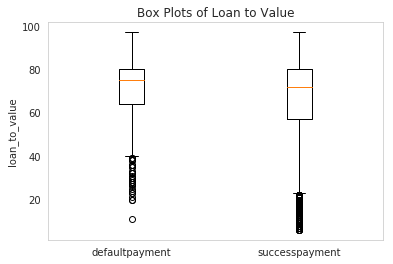

In [30]:
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of Loan to Value')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('loan_to_value')
plt.grid()
plt.show()


### debt_to_income_ratio

In [31]:
defaultpayment = train_data[train_data['m13']==1]['debt_to_income_ratio'].values

successpayment = train_data[train_data['m13']==0]['debt_to_income_ratio'].values

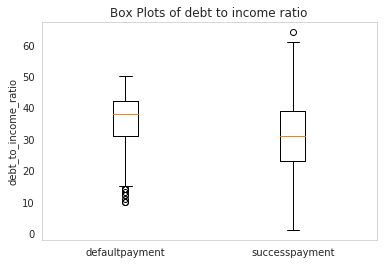

In [32]:
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of debt to income ratio')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('debt_to_income_ratio')
plt.grid()
plt.show()

### borrower_credit_score

In [33]:
defaultpayment = train_data[train_data['m13']==1]['borrower_credit_score'].values

successpayment = train_data[train_data['m13']==0]['borrower_credit_score'].values

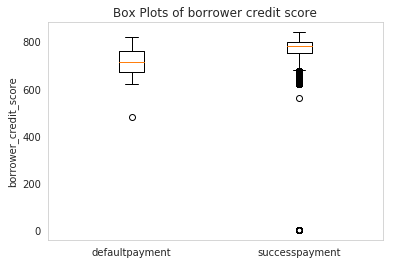

In [34]:
plt.boxplot([defaultpayment, successpayment])
plt.title('Box Plots of borrower credit score')
plt.xticks([1,2],('defaultpayment','successpayment'))
plt.ylabel('borrower_credit_score')
plt.grid()
plt.show()

In [35]:
# more credit score means they are able to repay their loan EMI. we can easily differentiate defaulters.

### loan_purpose

In [36]:
train_data["loan_purpose"].value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

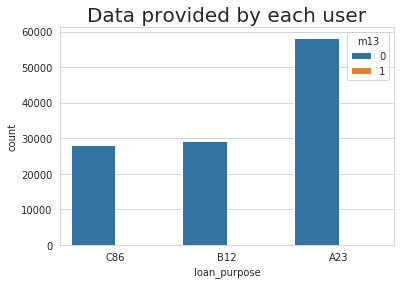

In [37]:
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='loan_purpose',hue='m13', data = train_data)
plt.show()

### insurance_percent

In [38]:
train_data["insurance_percent"].value_counts()

0.0     102455
30.0      5113
25.0      4885
12.0      2493
6.0        701
35.0       372
16.0        18
18.0        12
20.0         3
17.0         2
15.0         1
39.0         1
22.0         1
40.0         1
Name: insurance_percent, dtype: int64

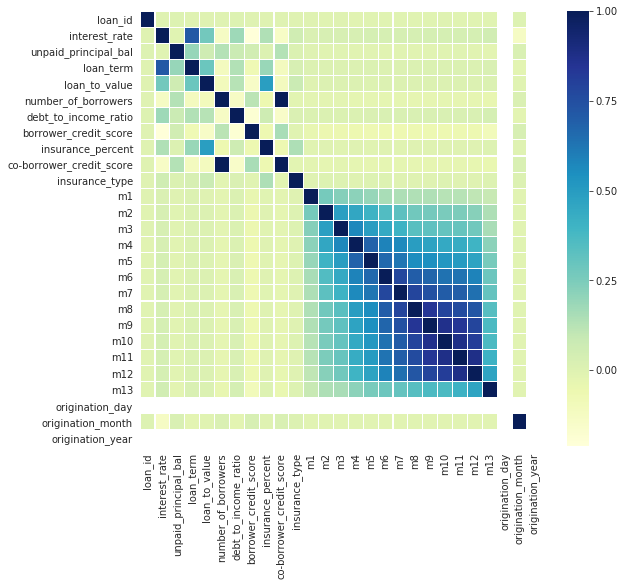

In [39]:
corrmat = train_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [40]:
# co-borrower_credit_score and number_of_borrowers are highly co-related. so we will take number_of_borrowers and 
# drop co-borrower_credit_score. 

### Feature Engineering:

In [41]:
# How many times in last one year a person becomes defaulter.
df = pd.DataFrame([0 for i in range(train_data.shape[0])] ,columns=['number_of_times_default'])

In [42]:
for i in range(0,train_data.shape[0]):
    count = 0
    for j in train_data.loc[i:i, 'm1':'m12'].values.tolist()[0][::-1]:
        if j != 0:
            count += 1
    df['number_of_times_default'].iloc[i] = count

In [43]:
train_data = pd.concat([train_data,df], axis=1)

In [44]:
df_test = pd.DataFrame([0 for i in range(test_data.shape[0])] ,columns=['number_of_times_default'])

In [45]:
for i in range(0,test_data.shape[0]):
    count = 0
    for j in test_data.loc[i:i, 'm1':'m12'].values.tolist()[0][::-1]:
        if j != 0:
            count += 1
    df_test['number_of_times_default'].iloc[i] = count

In [46]:
test_data = pd.concat([test_data,df_test], axis=1)

### One Hot Encoding for all Categorical data

In [47]:
all_onehot = []
all_onehot_test = []
for categorical_var in train_data.select_dtypes(include=['object']):
    if categorical_var not in ['origination_date','first_payment_date']:
        enc = OneHotEncoder(handle_unknown='ignore')
        categorical_var_train = enc.fit_transform(np.array(train_data[categorical_var]).reshape(-1, 1))
        categorical_var_test = enc.transform(np.array(test_data[categorical_var]).reshape(-1, 1))
        all_onehot.append(categorical_var_train.toarray())
        all_onehot_test.append(categorical_var_test.toarray())

In [48]:
target = train_data['m13']
new_train = train_data.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','co-borrower_credit_score','loan_purpose','m13'], axis=1)

In [49]:
new_test = test_data.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','co-borrower_credit_score','loan_purpose'], axis=1)

In [50]:
X_train = np.concatenate([new_train,all_onehot[0],all_onehot[1],all_onehot[2]], axis =1)

In [51]:
X_test = np.concatenate([new_test,all_onehot_test[0],all_onehot_test[1],all_onehot_test[2]], axis =1)

In [52]:
# as the data is imbalanced, we can go for class_weight="balanced" or give a optimal value to scale_pos_weight
xbgr = xgb.XGBClassifier(learning_rate =.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=6,
 gamma=.1,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=4,
 reg_alpha=100,
 class_weight="balanced" ,                      
 seed=27)

In [53]:
xbgr.fit(X_train, target)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.6, gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=6, missing=None, n_estimators=1000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=100, reg_lambda=1, scale_pos_weight=4, seed=27,
       silent=True, subsample=0.7)

In [55]:
y_pred_train = xbgr.predict(X_train)

Text(91.68,0.5,'predicted label')

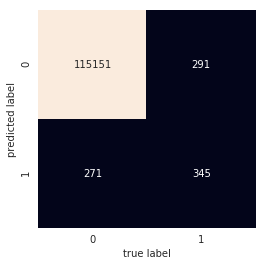

In [56]:
mat = confusion_matrix(target, y_pred_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [57]:
f1_score(target, y_pred_train)

0.5511182108626198

In [58]:
y_pred = xbgr.predict(X_test)

In [59]:
sam_sub_data = pd.read_csv('sample_submission.csv')

In [60]:
import csv 

with open('submission.csv', 'w', newline='') as writeFile:
    writer = csv.writer(writeFile)
    for i in range(len(y_pred)):
        writer.writerow([sam_sub_data['loan_id'].iloc[i],y_pred[i]])
        
writeFile.close()

### Hyperparameter Tuning using GridSearchCV

In [61]:
# f1_scorer = make_scorer(f1_score)
# hyper_parameter = {'subsample': [0.6, 0.8, 1.0],
# 'min_child_weight': [1, 5, 10],
# 'gamma': [0.5, 1, 1.5, 2, 5],
# 'max_depth': [3,5,8,10],
# "n_estimators": [100,300],
# 'colsample_bytree': [0.6, 0.8, 1.0],
# 'reg_alpha':[100],
# 'scale_pos_weight':[4,5]}

In [ ]:
# xgbc = xgb.XGBClassifier( learning_rate =0.1)
# clf = GridSearchCV(xgbc, hyper_parameter, verbose = 5, scoring=f1_scorer,n_jobs=-1, cv=3)
# clf.fit(X_train, target)